<a href="https://colab.research.google.com/github/SilahicAmil/NLP-NLTK/blob/main/More_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More Tweet Sentiment Analysis

https://www.kaggle.com/jp797498e/twitter-entity-sentiment-analysis?select=twitter_validation.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf


# Keras
import keras
from keras.layers import Embedding, TextVectorization

# SkLearn
from sklearn.model_selection import train_test_split

In [2]:
# Import data

train_df = pd.read_csv("/content/drive/MyDrive/Tweet_Sentiment/twitter_training.csv")
val_df = pd.read_csv("/content/drive/MyDrive/Tweet_Sentiment/twitter_validation.csv")

# Viewing Data

In [3]:
train_df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
train_df.value_counts()

2401   Borderlands                        Positive    im getting on borderlands and i will murder you all ,                                                                          
5810   HomeDepot                          Positive    Congratulations!!                                                                                                                  5
2895   Dota2                              Positive    Wow                                                                                                                                5
10181  PlayerUnknownsBattlegrounds(PUBG)  Irrelevant  Really                                                                                                                             5
3108   Dota2                              Negative    wtf                                                                                                                                5
1932   CallOfDutyBlackopsColdWar          Positive    Wow             

In [5]:
val_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


# Preprocessing Training Data

In [6]:
train_df = train_df.drop("Borderlands", 1)
train_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,2401,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Positive,I am coming to the borders and I will kill you...
1,2401,Positive,im getting on borderlands and i will kill you ...
2,2401,Positive,im coming on borderlands and i will murder you...
3,2401,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Positive,im getting into borderlands and i can murder y...


In [7]:
train_df = train_df.rename(columns={"2401": "ID", "Positive": "Sentiment", "im getting on borderlands and i will murder you all ,": "Text"})
# Dropping ID
train_df = train_df.drop("ID", axis=1)


In [8]:
train_df.head()

,Sentiment,Text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [9]:
train_df.Sentiment.value_counts()

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

In [10]:

train_df = train_df[train_df.Sentiment != "Neutral"]
train_df = train_df[train_df.Sentiment != "Irrelevant"]

In [11]:
train_df.Sentiment.value_counts()

Negative    22542
Positive    20831
Name: Sentiment, dtype: int64

In [12]:
mappings = {"Positive": 1, "Negative": 0}
final_train_df = train_df.replace({'Sentiment': mappings})

In [13]:
final_train_df.head()

,Sentiment,Text
0,1,I am coming to the borders and I will kill you...
1,1,im getting on borderlands and i will kill you ...
2,1,im coming on borderlands and i will murder you...
3,1,im getting on borderlands 2 and i will murder ...
4,1,im getting into borderlands and i can murder y...


# Validation Data Preprocesing

In [14]:
val_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [15]:
val_df = val_df.drop("Facebook", axis=1)

In [16]:
val_df.head()

,3364,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Neutral,Now the President is slapping Americans in the...
4,6273,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [17]:
val_df = val_df.rename(columns={"3364": "ID", "Irrelevant": "Sentiment", "I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣": "Text"})
val_df.head()

,ID,Sentiment,Text
0,352,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Neutral,Now the President is slapping Americans in the...
4,6273,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [18]:
val_df = val_df[val_df.Sentiment != "Neutral"]
val_df = val_df[val_df.Sentiment != "Irrelevant"]

In [19]:
val_df.Sentiment.value_counts()


Positive    277
Negative    266
Name: Sentiment, dtype: int64

In [20]:
# Dropping ID
val_df = val_df.drop("ID", axis=1)

In [21]:
val_df.head()

,Sentiment,Text
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."


In [22]:
val_df = val_df.replace({"Sentiment": mappings})
val_df.head()

,Sentiment,Text
1,0,@Microsoft Why do I pay for WORD when it funct...
2,0,"CSGO matchmaking is so full of closet hacking,..."
4,0,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,1,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,1,"Rocket League, Sea of Thieves or Rainbow Six: ..."


# Shuffling data

In [23]:
shuffled_train_data = final_train_df.sample(frac=1, random_state=42)

In [24]:
shuffled_train_data.head()

,Sentiment,Text
26631,1,Soooo... gassed.
69465,1,with our birthdays late april and the first we...
12626,0,Aye ya @NBA2K_MyTEAM give @mikal_bridges this ...
60198,1,Still my favourite account.
17537,1,That PS5 DE is going to look So damn good next...


In [25]:
shuffled_train_data.dtypes

Sentiment     int64
Text         object
dtype: object

In [26]:
shuffled_train_data["Text"][:20]

26631                                     Soooo... gassed.
69465    with our birthdays late april and the first we...
12626    Aye ya @NBA2K_MyTEAM give @mikal_bridges this ...
60198                          Still my favourite account.
17537    That PS5 DE is going to look So damn good next...
6087     As @amazon have have the scheduled reverse pic...
32711    I'm going to suck you dry~ FORTNITE I'm twitch...
10905    £449! Not too bad ( well although still an awf...
47277    I knew Home Draw Depot merchandise was so fuck...
22304    So I played CS:GO for his first time last nigh...
57105    @Rainbow6Game when I are you guys going to fix...
2588                          "This is gonna make my year"
46378                                               did..?
16026                                          Wtf is this
50652    2019: Too much time playing indoor video games...
65352    @ EAMaddenNFL Why don't you create an inactivi...
58907                             How many more ads will

# Creating Testing set

In [27]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(shuffled_train_data["Text"].to_numpy(),
                                                                                  shuffled_train_data["Sentiment"].to_numpy(),
                                                                                  test_size=0.2,
                                                                                  random_state=42)

In [28]:
len(train_sentences), len(test_sentences)

(34698, 8675)

# Vectorization

In [29]:
hist_x = shuffled_train_data["Text"].str.split().str.len()

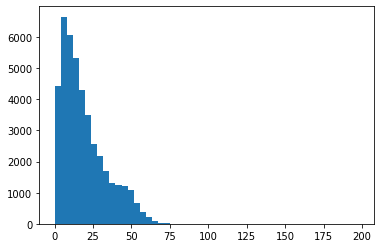

In [30]:
plt.hist(hist_x, bins=50);

I'm just gonna say the average word length is 20

In [31]:
MAX_VOCAB = 10_000
MAX_LEN = 20

txt_vect = TextVectorization(max_tokens=MAX_VOCAB,
                             output_mode="float",
                             output_sequence_length=MAX_LEN)

# TODO: Figure out how to preprocess the text and remove floats